In [1]:
%matplotlib inline

import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, real_dim), name = 'input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name = 'input_z')
    
    return inputs_real, inputs_z

In [4]:
def generator(z, out_dim, n_units = 128, reuse = False, alpha = 0.01):
    with tf.variable_scope('generator', reuse = reuse):
        h1 = tf.layers.dense(z, n_units, activation = None)
        h1 = tf.maximum(alpha * h1, h1) # Leaky_ReLU
        
        logits = tf.layers.dense(h1, out_dim, activation = None)
        out = tf.tanh(logits)
        
        return out

In [5]:
def discriminator(x, n_units = 128, reuse = False, alpha = 0.01):
    with tf.variable_scope('discriminator', reuse = reuse):
        h1 = tf.layers.dense(x, n_units, activation = None)
        h1 = tf.maximum(alpha * h1, h1)
        logits = tf.layers.dense(h1, 1, activation = None)
        out = tf.sigmoid(logits)
        
        return out, logits

In [6]:
#ハイパーパレメーターの初期化

input_size = 784
z_size = 100
g_hidden_size = 128
d_hidden_size = 128
alpha = 0.01
smooth = 0.1


In [7]:
#グラフの定義を行う

tf.reset_default_graph()
input_real, input_z = model_inputs(input_size, z_size)

g_model = generator(input_z, input_size, n_units = g_hidden_size, alpha = alpha)

d_model_real, d_logits_real = discriminator(input_real, n_units = d_hidden_size, alpha = alpha)
d_model_fake, d_logits_fake = discriminator(g_model, reuse = True, n_units = d_hidden_size, alpha = alpha)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [8]:
#損失関数の定義
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels = tf.ones_like(d_logits_real)*(1 - smooth)))
d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.zeros_like(d_logits_real)))

d_loss = d_loss_real + d_loss_fake

g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels = tf.ones_like(d_logits_fake)))

In [9]:
#最適化の定義
learning_rate = 0.002
t_vars = tf.trainable_variables()
g_vars = [var for var in t_vars if var.name.startswith('generator')]
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

d_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list = d_vars)
g_train_optimize = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list = g_vars)

In [10]:
batch_size = 100
batch = mnist.train.next_batch(batch_size)

In [11]:
batch

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([3, 1, 5, 1, 1, 4, 7, 3, 3, 3, 8, 0, 0, 1, 0, 1, 1, 3, 4, 2, 2, 4,
        0, 5, 1, 5, 3, 1, 5, 5, 2, 6, 6, 0, 7, 1, 6, 9, 5, 4, 7, 6, 5, 6,
        2, 3, 3, 3, 9, 4, 8, 8, 0, 4, 2, 1, 3, 8, 3, 7, 3, 2, 4, 3, 7, 2,
        5, 2, 1, 1, 6, 6, 5, 8, 3, 6, 3, 3, 1, 0, 0, 6, 8, 1, 5, 8, 3, 6,
        8, 8, 2, 8, 1, 2, 6, 5, 5, 7, 3, 5], dtype=uint8))

In [12]:
batch[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
len(batch[0])

100

In [14]:
batch[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
batch[1][0]

3

In [16]:
epochs = 100
samples = []
losses = []
saver = tf.train.Saver(var_list = g_vars)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for i in range(mnist.train.num_examples//batch_size):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape(batch_size, 784)
            batch_images = batch_images * 2 - 1
            
            #Generatorのランダムノイズ
            batch_z = np.random.uniform(-1, 1, size = (batch_size, z_size))
            
            _ = sess.run(d_train_optimize, feed_dict = {input_real:batch_images, input_z: batch_z})
            _ = sess.run(g_train_optimize, feed_dict = {input_z: batch_z})
            
        train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
        train_loss_g = g_loss.eval({input_z: batch_z})

        print("エポック{}/{}".format(e+1, epochs),
             "D ロス：{:.4f}".format(train_loss_d),
             "G ロス：{:.4f}".format(train_loss_g))

        losses.append((train_loss_d, train_loss_g))
        sample_z = np.random.uniform(-1, 1, size = (16,z_size))
        gan_samples = sess.run(generator(input_z, input_size, n_units = g_hidden_size, reuse = True, alpha = alpha),
                              feed_dict = {input_z: sample_z})
        samples.append(gan_samples)
        saver.save(sess, './checkpoints/generator.ckpt')

with open('training_samples.pkl', 'wb') as f:
                pkl.dump(samples, f)
            
            

エポック1/100 D ロス：0.3623 G ロス：3.6837
エポック2/100 D ロス：0.3668 G ロス：4.0163
エポック3/100 D ロス：0.4079 G ロス：3.0489
エポック4/100 D ロス：0.4061 G ロス：3.2417
エポック5/100 D ロス：0.9204 G ロス：3.6742
エポック6/100 D ロス：0.7641 G ロス：5.3402
エポック7/100 D ロス：2.3785 G ロス：2.7590
エポック8/100 D ロス：1.8503 G ロス：0.8760
エポック9/100 D ロス：1.7351 G ロス：3.2179
エポック10/100 D ロス：1.3134 G ロス：1.4751
エポック11/100 D ロス：1.8168 G ロス：1.5578
エポック12/100 D ロス：0.5566 G ロス：2.5406
エポック13/100 D ロス：1.0788 G ロス：2.0078
エポック14/100 D ロス：1.5505 G ロス：1.7200
エポック15/100 D ロス：1.6790 G ロス：2.4080
エポック16/100 D ロス：1.6813 G ロス：1.0795
エポック17/100 D ロス：1.3138 G ロス：1.7651
エポック18/100 D ロス：0.8565 G ロス：2.9804
エポック19/100 D ロス：0.6443 G ロス：2.6877
エポック20/100 D ロス：0.8586 G ロス：2.6442
エポック21/100 D ロス：0.8450 G ロス：2.3083
エポック22/100 D ロス：0.8463 G ロス：2.5424
エポック23/100 D ロス：1.0196 G ロス：1.5022
エポック24/100 D ロス：1.5322 G ロス：2.4537
エポック25/100 D ロス：1.0210 G ロス：1.3824
エポック26/100 D ロス：0.9376 G ロス：2.0386
エポック27/100 D ロス：1.0586 G ロス：2.0476
エポック28/100 D ロス：0.8130 G ロス：2.1432
エポック29/100 D ロス：0.8014 G ロス：2

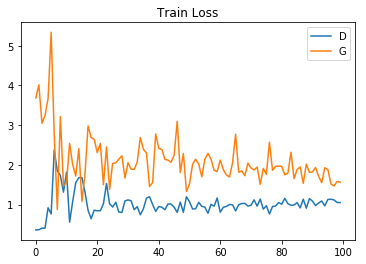

In [17]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label = 'D')
plt.plot(losses.T[1], label = 'G')
plt.title('Train Loss')
plt.legend()

イメージに変換して表示する

In [18]:
def view_samples(epochs, samples):
    fig, axes = plt.subplots(figsize = (7, 7), nrows = 4, ncols = 4, sharey = True, sharex = True)
    for ax, img in zip(axes.flatten(), samples[epochs]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28, 28)), cmap = 'Greys_r')
    return fig, axes

                       

In [19]:
with open('training_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

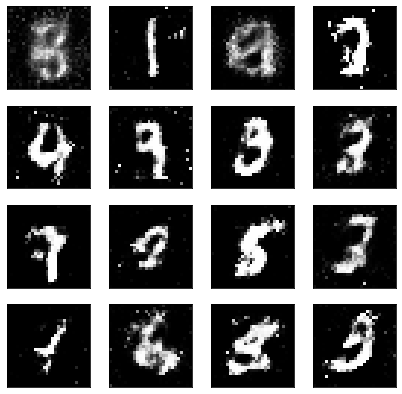

In [20]:
_ = view_samples(-1, samples)

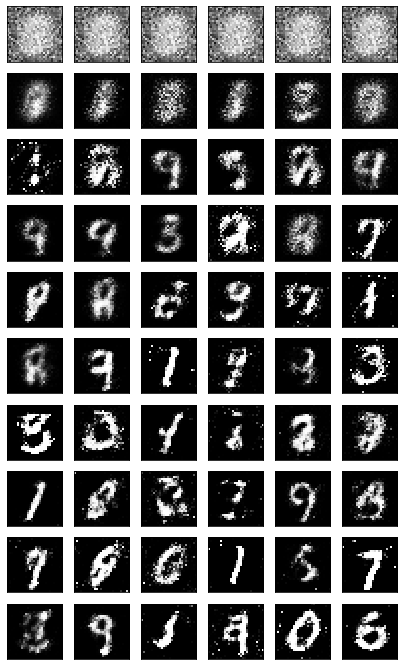

In [21]:
rows, cols = 10, 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        

チェックポイントファイルから機械に画像を生成させる

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from checkpoints\generator.ckpt


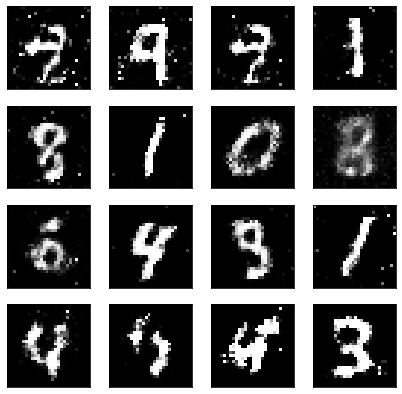

In [22]:
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    sample_z = np.random.uniform(-1, 1, size=(16, z_size))
    gen_samples = sess.run(generator(input_z, input_size, n_units=g_hidden_size, reuse=True, alpha=alpha),
                         feed_dict={input_z: sample_z})
_ = view_samples(0, [gen_samples])